In [1]:
import os
import sys

import pandas as pd
import numpy as np

import missingno as msno

sys.path.append('../src')
from botocore import UNSIGNED
from botocore.config import Config
from resloader.base import ResLoader

In [2]:
ResLoader.get_sim_names('2022')

['resstock_amy2018_release_1',
 'resstock_amy2018_release_1.1',
 'resstock_tmy3_release_1',
 'resstock_tmy3_release_1.1']

In [3]:
# setup
CACHE_DIR = '/Users/darwish/Documents/Berkeley_Offline/W210/capstone/s3_cache'

loader = ResLoader(
    cache_dir=CACHE_DIR,
    s3_config=Config(signature_version=UNSIGNED),
    sim_year='2022',
    sim_release='resstock_tmy3_release_1',
    sim_upgrade='0',
    sim_level='individual',
    sim_geo_agg='by_state',
)

nrel-pds-building-stock/end-use-load-profiles-for-us-building-stock/2022/resstock_tmy3_release_1/


In [4]:
x = loader.get_spatial_tract_lookups(raw=True)

loading /Users/darwish/Documents/Berkeley_Offline/W210/capstone/s3_cache/nrel-pds-building-stock/end-use-load-profiles-for-us-building-stock/2022/resstock_tmy3_release_1/geographic_information/spatial_tract_lookup_table.csv from cache


In [5]:
sim_keys = loader.get_sim_keys()
sim_keys

loading /Users/darwish/Documents/Berkeley_Offline/W210/capstone/s3_cache/nrel-pds-building-stock/end-use-load-profiles-for-us-building-stock/2022/resstock_tmy3_release_1/_staged/individual/by_state/0/sim_keys.parquet from cache


,key,lastmodified,etag,size,storageclass,file,state
0,nrel-pds-building-stock/end-use-load-profiles-...,2022-10-17 23:20:41+00:00,"""3af5983d0c121197d50a6a95ad75aeb7""",2.112351,INTELLIGENT_TIERING,100008-0.parquet,AR
1,nrel-pds-building-stock/end-use-load-profiles-...,2022-10-17 23:18:52+00:00,"""9c0753f1f0d0c00e4c8c1c33d8fcfb20""",1.877895,INTELLIGENT_TIERING,1002-0.parquet,AR
2,nrel-pds-building-stock/end-use-load-profiles-...,2022-10-17 23:19:55+00:00,"""7434ec841987a327949df60ee516ea4b""",1.939036,INTELLIGENT_TIERING,100223-0.parquet,AR
3,nrel-pds-building-stock/end-use-load-profiles-...,2022-10-17 23:20:20+00:00,"""a59aad40ed0472ab0e27aebbd0dc48e6""",2.152656,INTELLIGENT_TIERING,100365-0.parquet,AR
4,nrel-pds-building-stock/end-use-load-profiles-...,2022-10-17 23:21:16+00:00,"""f8e742e3fa577fa2c367e37905651b7c""",1.663760,INTELLIGENT_TIERING,100390-0.parquet,AR
...,...,...,...,...,...,...,...
548912,nrel-pds-building-stock/end-use-load-profiles-...,2022-10-17 23:20:12+00:00,"""d2270f51df555dd3577b136e4a9efb24""",1.483795,INTELLIGENT_TIERING,99967-0.parquet,CA
548913,nrel-pds-building-stock/end-use-load-profiles-...,2022-10-17 23:19:09+00:00,"""f17af2bdae117f5022f5eb83c3085d79""",1.896178,INTELLIGENT_TIERING,99973-0.parquet,CA
548914,nrel-pds-building-stock/end-use-load-profiles-...,2022-10-17 23:19:02+00:00,"""195d2f3e347f27c7ded3599b4093f23d""",2.598330,INTELLIGENT_TIERING,99978-0.parquet,CA
548915,nrel-pds-building-stock/end-use-load-profiles-...,2022-10-17 23:20:40+00:00,"""8f0599b5caeb8c834c37cf36f889fefa""",1.794364,INTELLIGENT_TIERING,99980-0.parquet,CA


In [6]:
sample = sim_keys['key'][0]
df = loader.get_load_profile(
    sample,
    # include=[
    #     'ceiling_fan', 'clothes_dryer', 'clothes_washer', 'cooking_range', 'cooling', 'dishwasher', 'ext_lighting', 'interior_lighting', 'refrigerator', 'heating', 'freezer'
    # ]
)
df.info()

downloading nrel-pds-building-stock/end-use-load-profiles-for-us-building-stock/2022/resstock_tmy3_release_1/timeseries_individual_buildings/by_state/upgrade=0/state=AR/100008-0.parquet from S3
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35040 entries, 2007-01-01 00:15:00 to 2008-01-01 00:00:00
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ceiling_fan         35040 non-null  float64
 1   clothes_dryer       35040 non-null  float64
 2   clothes_washer      35040 non-null  float64
 3   cooling_fans_pumps  35040 non-null  float64
 4   cooling             35040 non-null  float64
 5   dishwasher          35040 non-null  float64
 6   freezer             35040 non-null  float64
 7   heating_fans_pumps  35040 non-null  float64
 8   heating_hp_bkup     35040 non-null  float64
 9   heating             35040 non-null  float64
 10  hot_tub_heater      35040 non-null  float64
 11  hot_tub_pump        

In [5]:
sample_50 = individual_bldg_sim_keys['key'].sample(50).values
dfs = []
for key in sample_50:
    dfs.append(resapi.get_load_profile(key, cache_dir=CACHE_DIR))
    break

downloading nrel-pds-building-stock/end-use-load-profiles-for-us-building-stock/2021/resstock_amy2018_release_1/timeseries_individual_buildings/by_county/upgrade=0/county=G1700310/341243-0.parquet from S3


In [8]:
x = individual_bldg_sim_keys['key'].drop_duplicates()

Text(0.5, 1.0, 'Missing Or Zero Matrix')

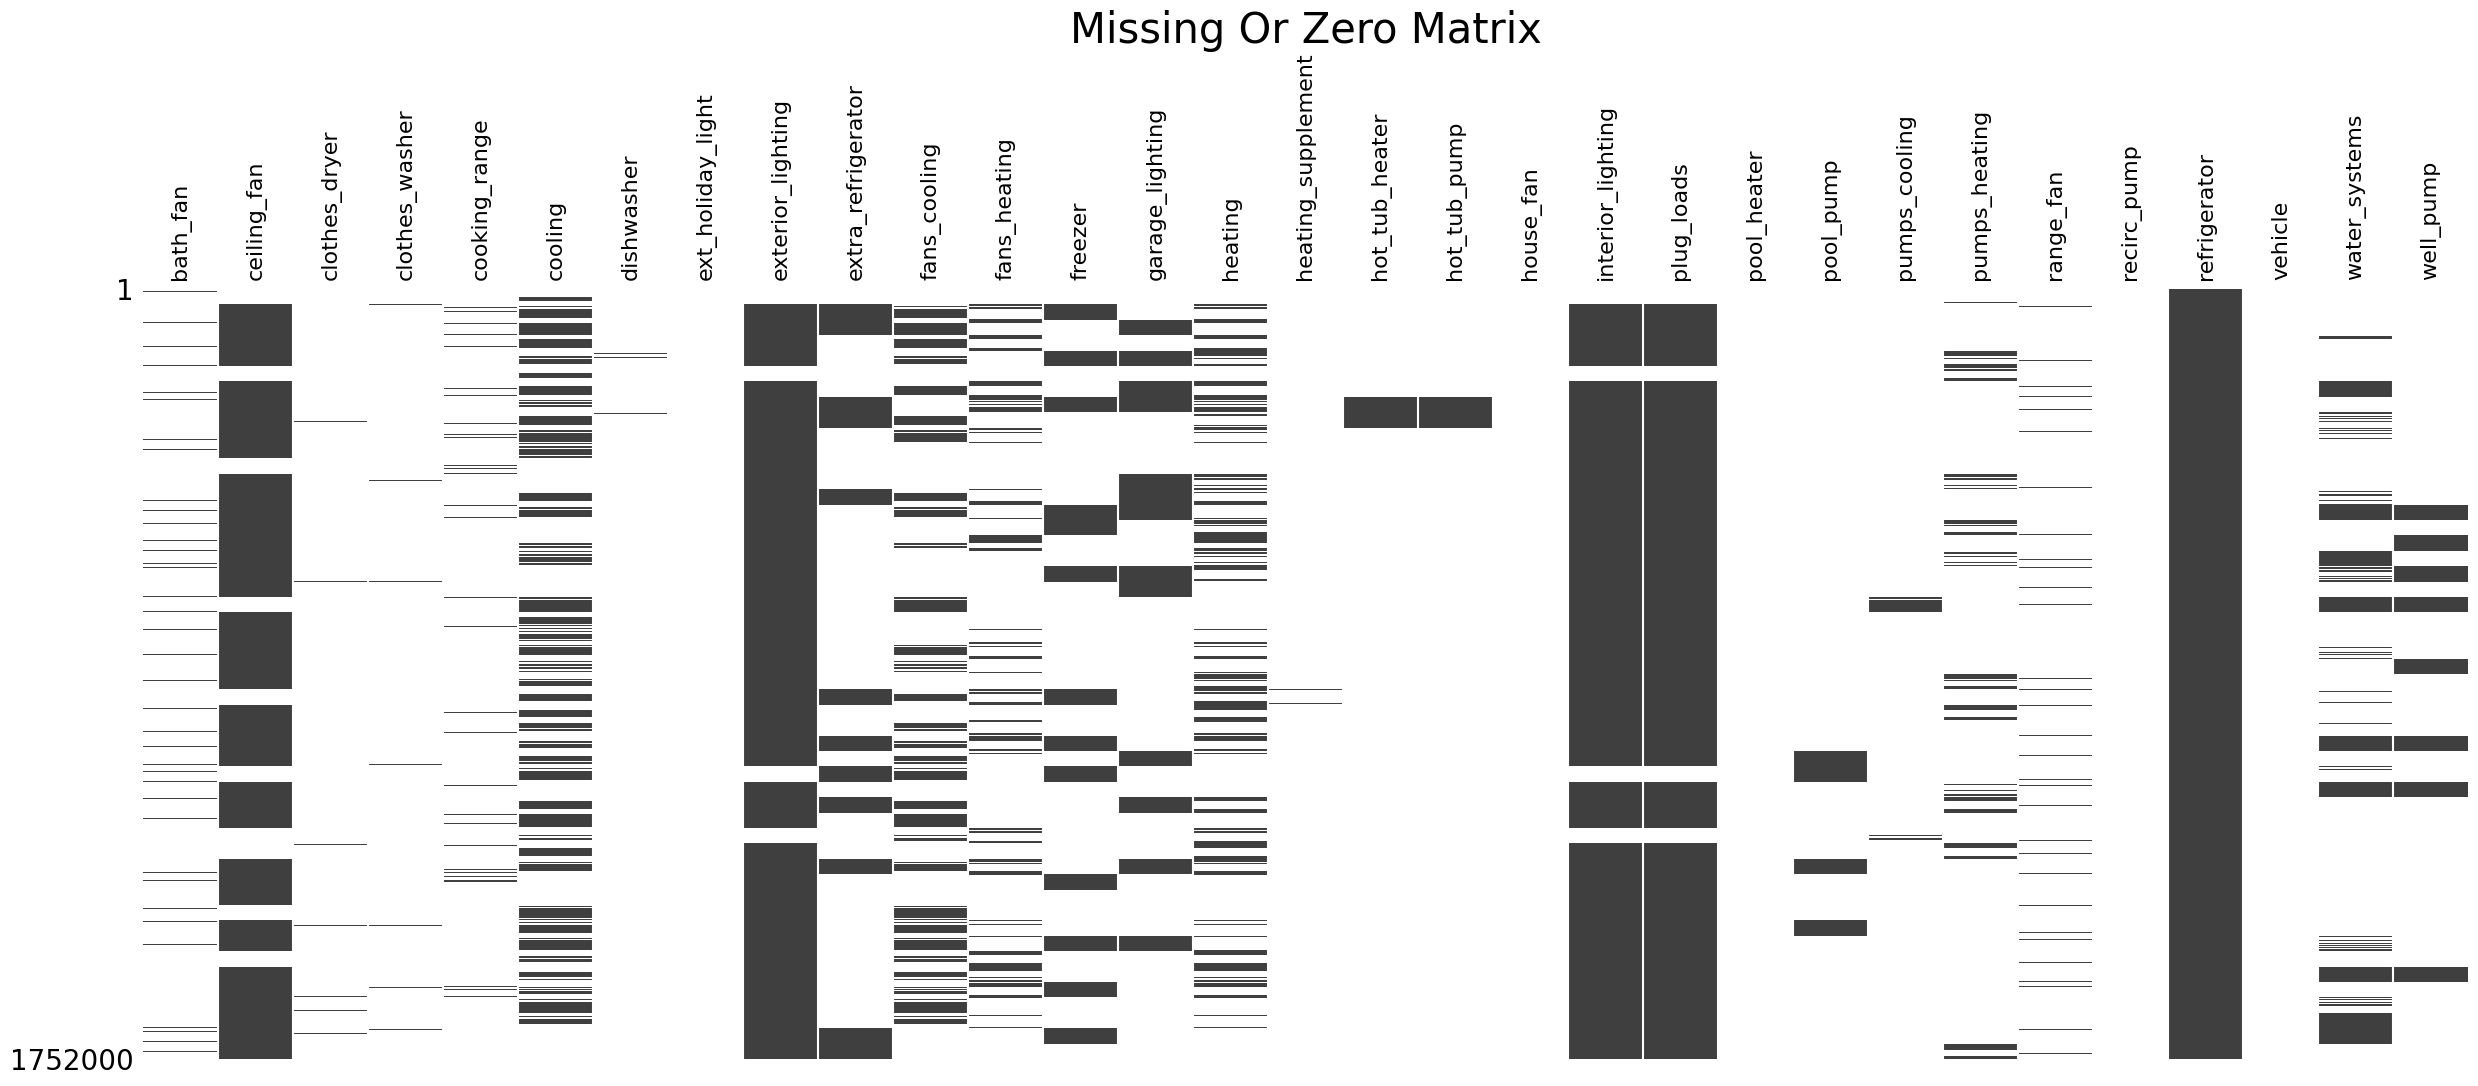

In [23]:
_df = (
    pd.concat(dfs, ignore_index=True)
    .map(lambda x: x if x > 0 else np.nan)
)

ax = msno.matrix(
    df=_df,
    figsize=(30, 10),
    labels=True,
    sparkline=False,
)

# rotate x-axis labels
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='center')
ax.set_title('Missing Or Zero Matrix', fontdict={'size': 30})

In [26]:
key = sample_50[0]
x = resapi.get_load_profile(key, cache_dir=CACHE_DIR)